Required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
from matplotlib import rcParams
plt.style.use("ggplot")
rcParams['figure.figsize'] = (12,  6)

# 1. Loading the Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd /content/drive/MyDrive/ETL

/content/drive/MyDrive/ETL


In [4]:
df_nd = pd.read_excel("emdat_public.xlsx")

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


# 2. Data Transformation

In [5]:
#Creating  copy of the original dataset 
df_nd_dup = df_nd

In [6]:
# drop first 5 rows of emdat dataset
df_nd = df_nd.drop(index=range(5))
df_nd = df_nd.set_axis(df_nd.iloc[0], axis=1).drop(df_nd.index[0])

In [7]:
df_nd.head(5)

5,Dis No,Year,Seq,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,...,"Reconstruction Costs, Adjusted ('000 US$)",Insured Damages ('000 US$),"Insured Damages, Adjusted ('000 US$)",Total Damages ('000 US$),"Total Damages, Adjusted ('000 US$)",CPI,Adm Level,Admin1 Code,Admin2 Code,Geo Locations
6,1900-9002-CPV,1900,9002,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.849084,NaN,NaN,NaN,NaN
7,1900-9001-IND,1900,9001,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.849084,NaN,NaN,NaN,NaN
8,1902-0012-GTM,1902,0012,NaN,Natural,Geophysical,Earthquake,Ground movement,NaN,NaN,...,NaN,NaN,NaN,25000,843726,2.963048,NaN,NaN,NaN,NaN
9,1902-0003-GTM,1902,0003,NaN,Natural,Geophysical,Volcanic activity,Ash fall,NaN,Santa Maria,...,NaN,NaN,NaN,NaN,NaN,2.963048,NaN,NaN,NaN,NaN
10,1902-0010-GTM,1902,0010,NaN,Natural,Geophysical,Volcanic activity,Ash fall,NaN,Santa Maria,...,NaN,NaN,NaN,NaN,NaN,2.963048,NaN,NaN,NaN,NaN


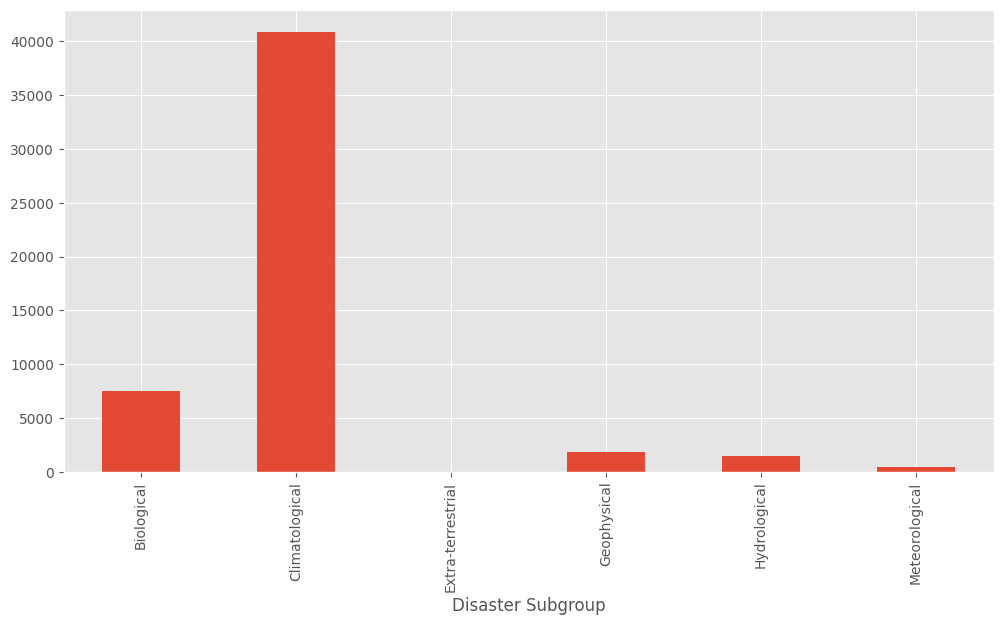

In [8]:
df_nd.groupby('Disaster Subgroup')["Total Deaths"].mean().plot.bar()
plt.show()

In [10]:
df_nd.isnull().sum()

5
Dis No                                           0
Year                                             0
Seq                                              0
Glide                                        14900
Disaster Group                                   0
Disaster Subgroup                                0
Disaster Type                                    0
Disaster Subtype                              3323
Disaster Subsubtype                          15519
Event Name                                   12667
Country                                          0
ISO                                              0
Region                                           0
Continent                                        0
Location                                      1811
Origin                                       12551
Associated Dis                               13043
Associated Dis2                              15873
OFDA Response                                14920
Appeal                       

In [11]:
df_nd.duplicated().sum()

0

## 1.1 Filtering records from Master table ( EMDAT)

In [12]:
##Removing the Biological and Extra Terrestrial values from Disaster Subgroup column
indexNames = df_nd[ df_nd['Disaster Subgroup'] == 'Biological' ].index
ExtraTer = df_nd[ df_nd['Disaster Subgroup'] == 'Extra-terrestrial' ].index

df_nd.drop(ExtraTer , inplace=True)
df_nd.drop(indexNames , inplace=True)

Since we got the number of missing data for each column, now we can drop the columns which has large number of missing rows (compared to total data of 16,649), which are:

    - Glide                        
    - Associated Dis                               
    - Associated Dis2
    - Dis Mag Value                               
    - Dis Mag Scale                                 
    - Latitude                                     
    - Longitude                                    
    - Local Time                                   
    - River Basin  
    - Geo Locations
    - Reconstruction Costs ('000 US)              
    - Reconstruction Costs, Adjusted ('000 US)    
    - Insured Damages ('000 US)                   
    - Insured Damages, Adjusted ('000 US)

We are not removing some of the columns like Start date, End date despite having large number of missing values because we'll be needing these columns for our usecase.

In [13]:
df_nd['Disaster Group'].value_counts()

Natural    15021
Name: Disaster Group, dtype: int64

In [14]:
df_nd.shape

(15021, 50)

We are also removing 'Diaster Group ' becaure it contains only one value.

## 1.2 Dropping unwanted Columns 

In [15]:
df_nd.drop(['Disaster Group','Seq', 'Glide', 'Appeal', 'Latitude', 'Longitude', 'Local Time', 'CPI',
         'Adm Level', 'Admin1 Code', 'Admin2 Code', 'Geo Locations', 'OFDA Response', 'Declaration',
         'Disaster Subtype', 'Disaster Subsubtype', 'Associated Dis', 'Associated Dis2', 'Dis Mag Value',
         'Dis Mag Scale', 'Local Time', 'River Basin', "Reconstruction Costs ('000 US$)", 
         "Reconstruction Costs, Adjusted ('000 US$)", "Insured Damages ('000 US$)", 
         "Insured Damages, Adjusted ('000 US$)", "Total Damages ('000 US$)",
         "Year", "AID Contribution ('000 US$)"], axis=1, inplace=True)

In [16]:
df_nd.head(5)

5,Dis No,Disaster Subgroup,Disaster Type,Event Name,Country,ISO,Region,Continent,Location,Origin,...,Start Day,End Year,End Month,End Day,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,"Total Damages, Adjusted ('000 US$)"
6,1900-9002-CPV,Climatological,Drought,NaN,Cabo Verde,CPV,Western Africa,Africa,Countrywide,NaN,...,NaN,1900,NaN,NaN,11000,NaN,NaN,NaN,NaN,NaN
7,1900-9001-IND,Climatological,Drought,NaN,India,IND,Southern Asia,Asia,Bengal,NaN,...,NaN,1900,NaN,NaN,1250000,NaN,NaN,NaN,NaN,NaN
8,1902-0012-GTM,Geophysical,Earthquake,NaN,Guatemala,GTM,Central America,Americas,"Quezaltenango, San Marcos",NaN,...,18,1902,4,18,2000,NaN,NaN,NaN,NaN,843726
9,1902-0003-GTM,Geophysical,Volcanic activity,Santa Maria,Guatemala,GTM,Central America,Americas,NaN,NaN,...,8,1902,4,8,1000,NaN,NaN,NaN,NaN,NaN
10,1902-0010-GTM,Geophysical,Volcanic activity,Santa Maria,Guatemala,GTM,Central America,Americas,NaN,NaN,...,24,1902,10,24,6000,NaN,NaN,NaN,NaN,NaN


## 2.1 Splitting the master table into 3 LKP tables and 1 Fact table 

In [17]:
df_nd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15021 entries, 6 to 16640
Data columns (total 22 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Dis No                              15021 non-null  object
 1   Disaster Subgroup                   15021 non-null  object
 2   Disaster Type                       15021 non-null  object
 3   Event Name                          2692 non-null   object
 4   Country                             15021 non-null  object
 5   ISO                                 15021 non-null  object
 6   Region                              15021 non-null  object
 7   Continent                           15021 non-null  object
 8   Location                            13550 non-null  object
 9   Origin                              4033 non-null   object
 10  Start Year                          15021 non-null  object
 11  Start Month                         14718 non-null  ob

In [9]:
df_Disaster = df_nd.loc[: , ['Disaster Subgroup', 'Disaster Type', 'Event Name','Origin']]
df_Calender = df_nd.loc[: , ['Start Year', 'Start Month', 'Start Day','End Year','End Month','End Day']]
df_Location = df_nd.loc[: , ['Country','ISO','Region', 'Continent','Location','Origin']]

 ## 2.2 Splitting of Location table into Country & Location Lookup tables

In [10]:
df_Country = df_Location.loc[: , ['Country','ISO', 'Continent']]
df_Location = df_Location.loc[: , ['Location','Region','ISO']]

## 3.1 Transpose the Location Column values into multiple rows sperated with ','

In [20]:
#Create a duplicate datatframe for location
df_Location_dup = df_Location

In [21]:
df_Location.tail(5)

5,Location,Origin,Region,ISO
16635,"Ingquza Hill, King Sabata Dalindyebo and Port ...",Heavy rains,Southern Africa,ZAF
16636,"Bulwa (Masisi, Nord-Kivu)",Heavy rains,Middle Africa,COD
16637,"Namwala, Monze and Mazabuka districts; Lusaka ...",Heavy rains,Eastern Africa,ZMB
16639,NaN,NaN,Eastern Africa,ZWE
16640,Sjenica and Brodarevo Novi Pazar Municipality;...,Heavy rainfall and river overflow,Southern Europe,SRB


In [49]:
# split the values in column 'A' by comma and create a new row for each split value
df_Location = df_Location.assign(Location=df_Location['Location'].str.split(',')).explode('Location')
df_Location = df_Location.assign(Location=df_Location['Location'].str.split(';')).explode('Location')

## 4.1 Dropping duplictes from the LookUp table -Disaster

In [55]:
df_Disaster.duplicated().sum()

0

In [51]:
df_Disaster = df_Disaster.drop_duplicates()

In [52]:
df_Disaster.duplicated().sum()

0

In [53]:
df_Disaster.isnull().sum()

5
Disaster Subgroup       0
Disaster Type           0
Event Name            691
Origin               1432
dtype: int64

## 4.2 Dropping duplictes from the LookUp table -Calender

In [56]:
df_Calender.head(3)

5,Start Year,Start Month,Start Day,End Year,End Month,End Day
6,1900,NaN,NaN,1900,NaN,NaN
7,1900,NaN,NaN,1900,NaN,NaN
8,1902,4,18,1902,4,18


In [59]:
df_Calender.duplicated().sum()

0

In [58]:
df_Calender = df_Calender.drop_duplicates()

## 4.3 Dropping duplictes from the LookUp table -Country

In [11]:
df_Country.duplicated().sum()

16408

In [15]:

df_Country['ISO'].isin(['CAN'])

6        False
7        False
8        False
11        True
12       False
         ...  
14514    False
14740    False
14789    False
14790    False
15488    False
Name: ISO, Length: 228, dtype: bool

In [12]:

df_Country = df_Country.drop_duplicates()

## 4.4 Dropping duplictes from the LookUp table -Location

In [65]:
df_Location.duplicated().sum()

0

In [64]:
df_Location = df_Location.drop_duplicates()

## 5.1 Create UniqueID for Look up tables - Disaster,Calender,Location

In [66]:
df_Disaster = df_Disaster.reset_index().rename(columns={'index': 'seqid'})
df_Disaster['seqid'] += 1

In [67]:
df_Calender = df_Calender.reset_index().rename(columns={'index': 'seqid'})
df_Calender['seqid'] += 1

In [68]:
df_Location = df_Location.reset_index().rename(columns={'index': 'seqid'})
df_Location['seqid'] += 1

In [72]:
df_Disaster.rename(columns={"seqid": "DisasterId"}, inplace=True)
df_Calender.rename(columns={"seqid": "CalenderId"}, inplace=True)
df_Location.rename(columns={"seqid": "LocationId"}, inplace=True)

## 6.1 Join the Lookup tables with Master table and populate the UniqueID of Diaster & Calender and final table Fact_Diaster

In [76]:
df_Disaster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2146 entries, 0 to 2145
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   DisasterId         2146 non-null   int64 
 1   Disaster Subgroup  2146 non-null   object
 2   Disaster Type      2146 non-null   object
 3   Event Name         1455 non-null   object
 4   Origin             714 non-null    object
dtypes: int64(1), object(4)
memory usage: 84.0+ KB


In [70]:
df_F_Diaster = pd.merge(df_nd, df_Calender, how='inner', on=['Start Year','Start Month','Start Day','End Year','End Month','End Day'])

In [77]:
df_F_Diaster = pd.merge(df_F_Diaster, df_Disaster, how='inner', on=['Disaster Subgroup','Disaster Type','Event Name','Origin'])

In [79]:
df_F_Diaster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15021 entries, 0 to 15020
Data columns (total 24 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Dis No                              15021 non-null  object
 1   Disaster Subgroup                   15021 non-null  object
 2   Disaster Type                       15021 non-null  object
 3   Event Name                          2692 non-null   object
 4   Country                             15021 non-null  object
 5   ISO                                 15021 non-null  object
 6   Region                              15021 non-null  object
 7   Continent                           15021 non-null  object
 8   Location                            13550 non-null  object
 9   Origin                              4033 non-null   object
 10  Start Year                          15021 non-null  object
 11  Start Month                         14718 non-null  ob

In [94]:
df_F_Diaster.drop(['Disaster Subgroup', 'Disaster Type', 'Country', 'Region', 'Continent', 'Location', 'Origin', 'Start Year', 'Start Month',
         'Start Day', 'End Year', 'End Month', 'End Day','Event Name'], axis=1, inplace=True)

KeyError: ignored

In [95]:
df_F_Diaster.drop(['Event Name'], axis=1, inplace=True)

In [82]:
df_F_Diaster.head(3)

5,Dis No,Event Name,ISO,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,"Total Damages, Adjusted ('000 US$)",CalenderId,DisasterId
0,1900-9002-CPV,NaN,CPV,11000,NaN,NaN,NaN,NaN,NaN,7,7
1,1900-9001-IND,NaN,IND,1250000,NaN,NaN,NaN,NaN,NaN,7,7
2,1903-9001-NER,NaN,NER,NaN,NaN,NaN,NaN,NaN,NaN,13,7


## 6.2 Join the Population & Life expectancy with LookUp tables Country and Calender and populate the Fact_Poulation

In [109]:
df_pop = pd.read_excel("Population.xlsx")

In [112]:
# drop first 5 rows of emdat dataset
df_pop = df_pop.set_axis(df_pop.iloc[0], axis=1).drop(df_pop.index[0])

In [113]:
df_pop.head(5)

,Entity,Code,Year,Life_expectancy_at_birth__historical_,Population
1,Aruba,ABW,1960,64.2,54608
2,Aruba,ABW,1961,64.5,55811
3,Aruba,ABW,1962,64.8,56682
4,Aruba,ABW,1963,65.1,57475
5,Aruba,ABW,1964,65.3,58178


In [138]:
#df_pop = pd.merge(df_pop, df_Country, how='inner', on=[''])
merged_df_pop = pd.merge(df_pop, df_Country, left_on='Code', right_on='CntryCd')

In [141]:
merged_df_pop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 376 entries, 0 to 375
Data columns (total 4 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   Year                                   376 non-null    object
 1   Life_expectancy_at_birth__historical_  376 non-null    object
 2   Population                             376 non-null    object
 3   CntryCd                                376 non-null    object
dtypes: object(4)
memory usage: 14.7+ KB


In [140]:
merged_df_pop= merged_df_pop.drop(['Continent','Country','Entity','Code'], axis=1)

In [142]:
merged_df_pop.to_csv("population.csv", encoding='utf-8')

## 7.1 Cleaning , renaming and updating the datatyes

In [86]:
##Imputing the Null values
df_Calender['Start Day'] = df_Calender['Start Day'].fillna(1)
df_Calender['Start Month'] = df_Calender['Start Month'].fillna(1)

##Changing the data type from float to int
df_Calender['Start Day'] = df_Calender['Start Day'].astype(int)
df_Calender['Start Month'] = df_Calender['Start Month'].astype(int)

In [87]:
##If the End Day is NaN, then replacing NaN value with the corresponding Start Day, similar for End Month
df_Calender.loc[df_Calender['End Day'].isnull()==True, 'End Day'] = df_Calender.loc[df_Calender['End Day'].isnull()==True, 'Start Day']
df_Calender.loc[df_Calender['End Month'].isnull()==True, 'End Month'] = df_Calender.loc[df_Calender['End Month'].isnull()==True, 'Start Month']

In [88]:
##Changing the data type from float to int
df_Calender['End Day'] = df_Calender['End Day'].astype(int)
df_Calender['End Month'] = df_Calender['End Month'].astype(int)

In [90]:
##Renaming the Column
df_F_Diaster.rename(columns={"Total Damages, Adjusted ('000 US$)": "Total Damages"}, inplace=True)

In [92]:
##Doing Currency conversion from USD to EUR
df_F_Diaster["Total Damages"] = df_F_Diaster["Total Damages"]*0.97

# Convert the unit from thousands to None
df_F_Diaster['Total Damages'] = df_F_Diaster['Total Damages']*1000

We needed to rename the columns because BigQuery data schema does not allow for spaces of special characters

In [116]:
df_Country.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 225 entries, 6 to 15488
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Country    225 non-null    object
 1   CntryCd    225 non-null    object
 2   Continent  225 non-null    object
dtypes: object(3)
memory usage: 7.0+ KB


In [18]:
df_Country.to_csv("Country.csv", encoding='utf-8')

In [102]:
df_F_Diaster = df_F_Diaster.rename(columns={"Dis No":"DisNo","ISO":"CntryCd","Total Deaths":"TotalDeaths","No Injured":"NoInjured","No Affected":"NoAffected",
                        "No Homeless":"NoHomeless","Total Affected":"TotalAffected","Total Damages":"TotalDamages"})
df_Calender = df_Calender.rename(columns={"Start Year":"StartYear","Start Month":"StartMonth","Start Day":"StartDay","End Year":"EndYear",
                        "End Month":"EndMonth","End Day":"EndDay"})
df_Disaster = df_Disaster.rename(columns={"Disaster Group":"DisasterGroup","Disaster Subgroup":"DisasterSubgroup","Disaster Type":"DisasterType"})
df_Location = df_Location.rename(columns={"ISO":"CntryCd"})
df_Country = df_Country.rename(columns={"ISO":"CntryCd"})

In [103]:
for col in df_Location.columns:
    if df_Location[col].dtype == 'object':
        df_Location[col].fillna("none", inplace=True)

    else:
        df_Location[col].fillna(0, inplace=True)

for col in df_F_Diaster.columns:
    if df_F_Diaster[col].dtype == 'object':
        df_F_Diaster[col].fillna("none", inplace=True)

    else:
        df_F_Diaster[col].fillna(0, inplace=True)

for col in df_Calender.columns:
    if df_Calender[col].dtype == 'object':
        df_Calender[col].fillna("none", inplace=True)

    else:
        df_Calender[col].fillna(0, inplace=True)
for col in df_Location.columns:
    if df_Location[col].dtype == 'object':
        df_Location[col].fillna("none", inplace=True)

    else:
        df_Location[col].fillna(0, inplace=True)

for col in df_Country.columns:
    if df_Country[col].dtype == 'object':
        df_Country[col].fillna("none", inplace=True)

    else:
        df_Country[col].fillna(0, inplace=True)

In [106]:
df_F_Diaster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15021 entries, 0 to 15020
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   DisNo          15021 non-null  object
 1   CntryCd        15021 non-null  object
 2   TotalDeaths    15021 non-null  object
 3   NoInjured      15021 non-null  object
 4   NoAffected     15021 non-null  object
 5   NoHomeless     15021 non-null  object
 6   TotalAffected  15021 non-null  object
 7   TotalDamages   15021 non-null  object
 8   CalenderId     15021 non-null  int64 
 9   DisasterId     15021 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 1.3+ MB


In [107]:
df_F_Diaster['TotalDeaths'] = df_F_Diaster['TotalDeaths'].astype(int)

ValueError: ignored

In [105]:
#df_F_Diaster['TotalDeaths'] = df_F_Diaster['TotalDeaths'].astype('int64')
df_F_Diaster['NoInjured'] = df_F_Diaster['NoInjured'].astype('int64')
df_F_Diaster['NoAffected'] = df_F_Diaster['NoAffected'].astype('int64')
df_F_Diaster['NoHomeless'] = df_F_Diaster['NoHomeless'].astype('int64')
df_F_Diaster['TotalAffected'] = df_F_Diaster['TotalAffected'].astype('int64')
df_F_Diaster['TotalDamages'] = df_F_Diaster['TotalDamages'].astype('int64')

ValueError: ignored

In [108]:
df_F_Diaster.to_csv("F_Disaster.csv", encoding='utf-8')
df_Country.to_csv("Country.csv", encoding='utf-8')
df_Calender.to_csv("Calender.csv", encoding='utf-8')
df_Location.to_csv("Location.csv", encoding='utf-8')
df_Disaster.to_csv("Disaster.csv", encoding='utf-8')

In [131]:
merged_df_pop.head(10)

AttributeError: ignored

In [129]:
merged_df_pop.to_csv("population.csv", encoding='utf-8')

AttributeError: ignored